# Convolutional Neural Network
* Tend to be used for images
* Seem to be better at sequential data than RNN as of late

In [15]:
import os 
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS: 
            print(label)
            for f in tqdm(os.listdir(label)): # tqdm is progress bar
                try:
                    path = os.path.join(label, f) # Set up path
                    # Read in image in grayscale
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    # Resize
                    img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    # Set up training data
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    # Count samples from each class
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                    # print(str(e))
        
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|▍                                                                             | 72/12501 [00:00<00:17, 711.22it/s]

PetImages/Cat


  1%|▍                                                                             | 70/12501 [00:00<00:17, 694.94it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:15<00:00, 789.03it/s]


Cats:  12476
Dogs:  12470


In [16]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [17]:
print(len(training_data))

24946


In [23]:
print(training_data[2])

[array([[136,  71, 155, ...,  74,  94,  95],
       [135, 103, 167, ..., 107, 115,  92],
       [161, 136,  81, ...,  85, 110,  98],
       ...,
       [ 23,  25,  32, ...,  65,  35,  69],
       [ 22,  34,  28, ...,  85, 109,  58],
       [ 30,  30,  47, ...,  53,  54,  92]], dtype=uint8)
 array([0., 1.])]


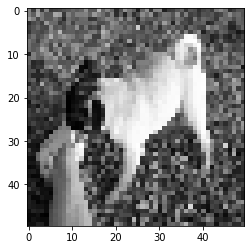

In [25]:
import matplotlib.pyplot as plt

plt.imshow(training_data[2][0], cmap="gray")
plt.show()

In [28]:
training_data[2][1]

array([0., 1.])